## **Building a predictive of Students’ Final Mathematics Performance Machine Learning Approach at Akosombo VRA JHS No. 2, Asuogyaman District**

In [67]:
#Importing Libraries for the work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score, learning_curve, KFold
import shap

In [68]:
# Load the Excel file
file_path = r"C:\Users\USER\PREDICTING MATH SCORES\NEW DATA OF STUDENTS OF VRA JHS NO. 2.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [69]:
df.columns

Index(['Student ID', 'Age', 'Gender', 'Hours of studies per week',
       'Attendance', 'Class participation', 'Extra curricular involvement',
       'Parents marital status', 'Staying with', 'Homework completion (20%)',
       'Class Assessment Task (20%)', 'Final Math Score 100%'],
      dtype='object')

In [70]:
# Preview the dataset
print(df.head())

    Student ID  Age  Gender  Hours of studies per week  Attendance  \
0  VRAJHS2-063   16  Female                       28.0          67   
1  VRAJHS2-046   15    Male                       21.0          65   
2  VRAJHS2-002   14    Male                       35.0          66   
3  VRAJHS2-466   13  Female                       14.0          63   
4  VRAJHS2-024   14    Male                       21.0          62   

  Class participation Extra curricular involvement Parents marital status  \
0                 Low                           No                Married   
1                 Low                          Yes                Married   
2            Moderate                           No                Married   
3            Moderate                           No                Married   
4                 Low                           No               Divorced   

  Staying with  Homework completion (20%)  Class Assessment Task (20%)  \
0      Parents                         17 

In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student ID                    272 non-null    object 
 1   Age                           272 non-null    int64  
 2   Gender                        272 non-null    object 
 3   Hours of studies per week     272 non-null    float64
 4   Attendance                    272 non-null    int64  
 5   Class participation           272 non-null    object 
 6   Extra curricular involvement  272 non-null    object 
 7   Parents marital status        272 non-null    object 
 8   Staying with                  272 non-null    object 
 9   Homework completion (20%)     272 non-null    int64  
 10  Class Assessment Task (20%)   272 non-null    int64  
 11  Final Math Score 100%         272 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 25.6+ KB
None


In [72]:
# Drop Student ID (not useful for prediction)
df = df.drop(columns=['Student ID'])

In [73]:
# View first few rows to check if the Studen ID coulmn has been removed
df.head()

,Age,Gender,Hours of studies per week,Attendance,Class participation,Extra curricular involvement,Parents marital status,Staying with,Homework completion (20%),Class Assessment Task (20%),Final Math Score 100%
0,16,Female,28.0,67,Low,No,Married,Parents,17,7,25
1,15,Male,21.0,65,Low,Yes,Married,Parents,17,13,26
2,14,Male,35.0,66,Moderate,No,Married,Parents,16,12,29
3,13,Female,14.0,63,Moderate,No,Married,Parents,15,13,63
4,14,Male,21.0,62,Low,No,Divorced,Mother,15,7,40


In [74]:
# Descriptive statistics for numerical variables
print("Descriptive Statistics (Numerical Variables):\n")
print(df.describe().transpose().round(2))

Descriptive Statistics (Numerical Variables):

                             count   mean    std   min   25%   50%   75%   max
Age                          272.0  13.89   1.57  11.0  13.0  14.0  15.0  20.0
Hours of studies per week    272.0  12.82   8.63   0.0   7.0  14.0  21.0  42.0
Attendance                   272.0  66.86   7.06  20.0  66.0  69.5  71.0  71.0
Homework completion (20%)    272.0  13.38   4.21   2.0  10.0  15.0  16.0  20.0
Class Assessment Task (20%)  272.0  12.01   4.55   2.0   8.0  11.0  15.0  20.0
Final Math Score 100%        272.0  36.98  15.46   8.0  26.0  34.0  45.0  90.0


In [75]:
#STEP 1:DATA CLEANING AND PREPROCESSING

In [76]:
#Encoding Categorical Variables
# Initialize label encoder
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns


In [77]:
# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if you want to decode later

In [78]:
# View first few rows to check if the categorical variables are encoded
df.head()

,Age,Gender,Hours of studies per week,Attendance,Class participation,Extra curricular involvement,Parents marital status,Staying with,Homework completion (20%),Class Assessment Task (20%),Final Math Score 100%
0,16,0,28.0,67,1,0,3,9,17,7,25
1,15,1,21.0,65,1,1,3,9,17,13,26
2,14,1,35.0,66,2,0,3,9,16,12,29
3,13,0,14.0,63,2,0,3,9,15,13,63
4,14,1,21.0,62,1,0,2,7,15,7,40


### **STEP 2: Exploratory Data Analysis**

In [79]:
# Group scores into bins of 10
bins = range(0, 101, 10)  # 0–100 step 10
score_bins = pd.cut(df["Final Math Score 100%"], bins, right=False)

# Count how many fall into each bin
bin_counts = score_bins.value_counts().sort_index()

print(bin_counts)


Final Math Score 100%
[0, 10)       4
[10, 20)     26
[20, 30)     65
[30, 40)     75
[40, 50)     49
[50, 60)     29
[60, 70)     14
[70, 80)      5
[80, 90)      4
[90, 100)     1
Name: count, dtype: int64


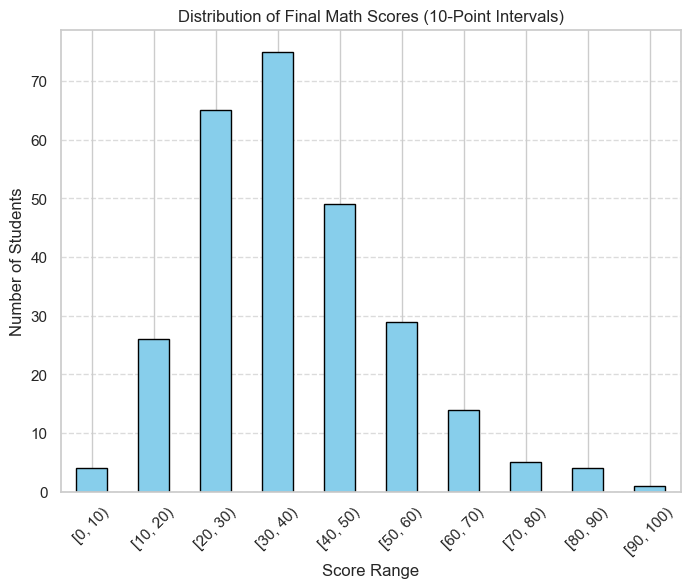

In [81]:
import matplotlib.pyplot as plt

# Group scores into bins of 10
bins = range(0, 101, 10)  # 0–100 step 10
score_bins = pd.cut(df["Final Math Score 100%"], bins, right=False)

# Count how many fall into each bin
bin_counts = score_bins.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8,6))
bin_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribution of Final Math Scores (10-Point Intervals)")
plt.xlabel("Score Range")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


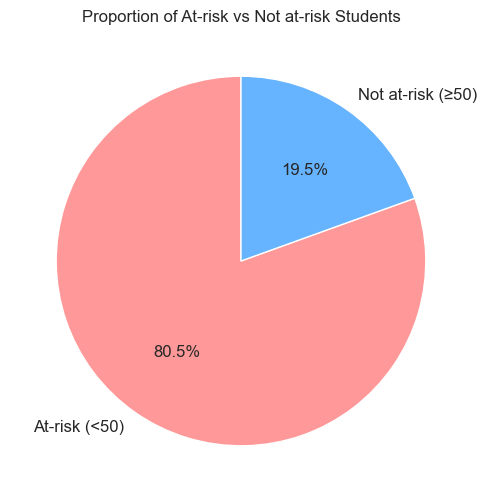

In [87]:
# Binary classification based on pass threshold (50)
at_risk = (df["Final Math Score 100%"] < 50).sum()
not_at_risk = (df["Final Math Score 100%"] >= 50).sum()

labels = ["At-risk (<50)", "Not at-risk (≥50)"]
sizes = [at_risk, not_at_risk]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff9999","#66b3ff"],
    textprops={"fontsize":12}
)
plt.title("Proportion of At-risk vs Not at-risk Students")
plt.show()

Correlation Matrix (Heatmap)

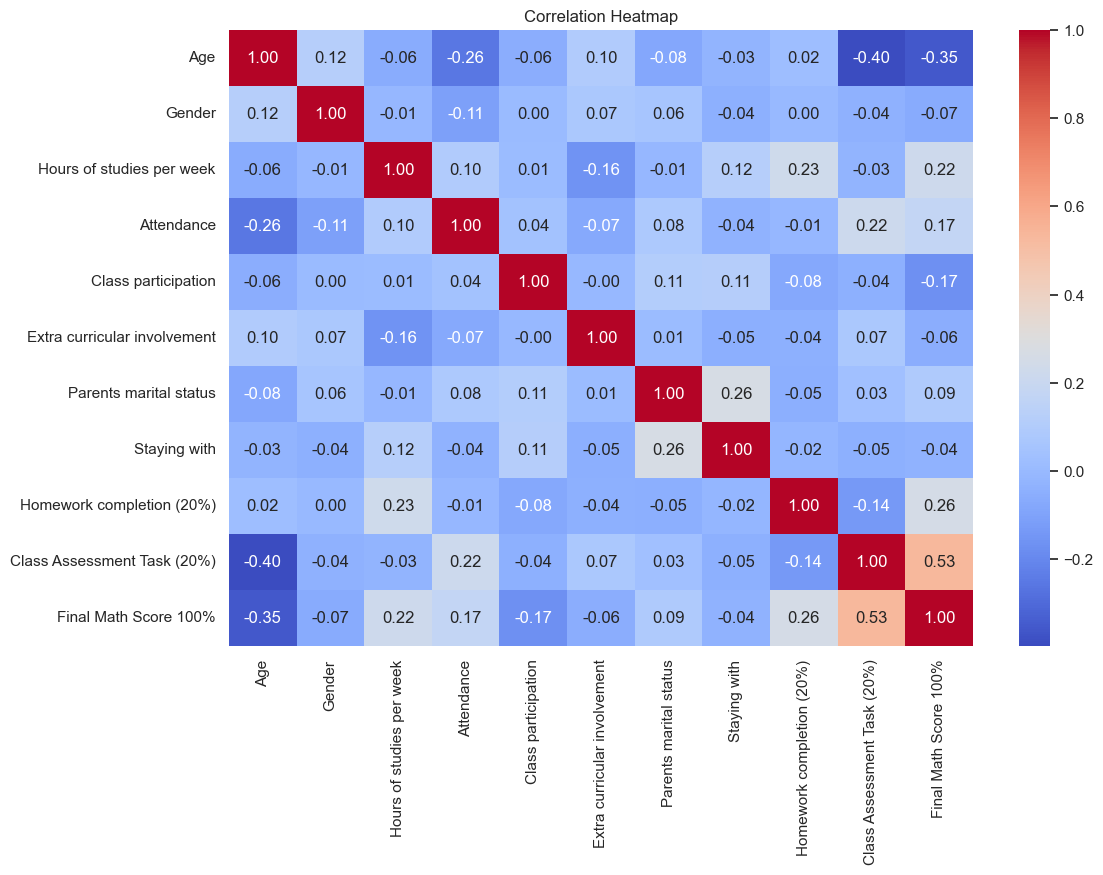

In [80]:
#make plots look cleaner
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Compute correlation only on numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### PAIRWISE CORRELATION TO CHECK SIGNIFICANT LEVELS

In [15]:
from scipy import stats
import pandas as pd

# Continuous variables to test against Final Math Score
continuous_vars = [
    'Age',
    'Hours of studies per week',
    'Attendance',
    'Homework completion (20%)',
    'Class Assessment Task (20%)',
]

# Dictionary for results
corr_results = {}

# Run Pearson correlation for each variable
for var in continuous_vars:
    corr, pval = stats.pearsonr(df[var], df['Final Math Score 100%'])
    corr_results[var] = {"Correlation": round(corr, 3), "p-value": round(pval, 4)}

# Convert to DataFrame
corr_table = pd.DataFrame(corr_results).T

# Filter significant variables (p < 0.05) and sort by absolute correlation
significant_vars = corr_table[corr_table['p-value'] < 0.05].copy()
significant_vars['abs_corr'] = significant_vars['Correlation'].abs()
significant_vars = significant_vars.sort_values(by='abs_corr', ascending=False).drop(columns='abs_corr')

print("=== Significant Variables (p < 0.05) ===")
print(significant_vars)


=== Significant Variables (p < 0.05) ===
                             Correlation  p-value
Class Assessment Task (20%)        0.533   0.0000
Age                               -0.355   0.0000
Homework completion (20%)          0.256   0.0000
Hours of studies per week          0.223   0.0002
Attendance                         0.172   0.0045


In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Categorical variables
categorical_vars = [
    'Gender', 
    'Class participation', 
    'Extra curricular involvement', 
    'Parents marital status', 
    'Staying with'
]

# Initialize dictionary to store ANOVA results
anova_results = {}

# Run ANOVA for each categorical variable
for var in categorical_vars:
    model = ols(f'Q("Final Math Score 100%") ~ C(Q("{var}"))', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f_stat = round(anova_table['F'][0], 3)
    p_val = round(anova_table['PR(>F)'][0], 4)
    anova_results[var] = {'F-statistic': f_stat, 'p-value': p_val}

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results).T

# Display full table
print("=== ANOVA Results for All Categorical Variables ===")
print(anova_df)

# Filter only significant variables (p < 0.05)
significant_anova_df = anova_df[anova_df['p-value'] < 0.05]
print("\n=== Significant Categorical Variables (p < 0.05) ===")
print(significant_anova_df)

  

=== ANOVA Results for All Categorical Variables ===
                              F-statistic  p-value
Gender                              1.189   0.2764
Class participation                65.738   0.0000
Extra curricular involvement        0.908   0.3415
Parents marital status              0.787   0.5344
Staying with                        0.996   0.4529

=== Significant Categorical Variables (p < 0.05) ===
                     F-statistic  p-value
Class participation       65.738      0.0


In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Select the continuous variables (and encoded categorical variables if applicable)
features = [
    'Age',
    'Hours of studies per week',
    'Attendance',
    'Homework completion (20%)',
    'Class Assessment Task (20%)',
    # Include one-hot encoded categorical variables here, e.g. 'ClassParticipation_High', 'ClassParticipation_Moderate'
]

# Prepare the data
X = df[features]

# Add constant term for intercept
X = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                      Variable         VIF
0                        const  270.002330
1                          Age    1.237533
2    Hours of studies per week    1.070330
3                   Attendance    1.100104
4    Homework completion (20%)    1.076308
5  Class Assessment Task (20%)    1.234676


In [37]:
# ==============================
# Feature Engineering
# ==============================
df['attendance_rate_percent'] = df['Attendance'] / 71
df['homework_ratio'] = df['Homework completion (20%)'] / 20
df['assessment_ratio'] = df['Class Assessment Task (20%)'] / 20
df['study_efficiency'] = df['Hours of studies per week'] / (df['Homework completion (20%)'] + 1)
df['attendance_x_homework'] = df['attendance_rate_percent'] * df['homework_ratio']
df['attendance_x_assessment'] = df['attendance_rate_percent'] * df['assessment_ratio']
df['study_x_homework'] = df['study_efficiency'] * df['homework_ratio']

# ==============================
# Variable Selection
# ==============================

# Original significant continuous variables
continuous_vars = [
    'Class Assessment Task (20%)',
    'Homework completion (20%)',
    'Hours of studies per week',
    'Attendance',
    'Age'
]

# Engineered features
engineered_vars = [
    'attendance_rate_percent',
    'homework_ratio',
    'assessment_ratio',
    'study_efficiency',
    'attendance_x_homework',
    'attendance_x_assessment',
    'study_x_homework'
]

# One-hot encode categorical variables
categorical_vars = ['Class participation']  # add more if needed
df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)  # avoids dummy variable trap

# ==============================
# Final Dataset for Modeling
# ==============================
X = pd.concat([df[continuous_vars + engineered_vars], df_encoded], axis=1)
y = df['Final Math Score 100%']

# ==============================
# Standardize Predictors
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Final dataset prepared for model training and evaluation.")
print("Shape of X_scaled:", X_scaled.shape)


Final dataset prepared for model training and evaluation.
Shape of X_scaled: (272, 13)


## **4.2 Model Training and Baseline Comparison**

### **LINEAR-BASED MODEL:RIDGE, LASSO AND ELASTIC NET**



In [19]:
###Linear-based odel (Ridge, Lasso and Elastic Net)
# ==========================
# 1. Dataset 
# ==========================
# Use scaled predictors and target directly
X = X_scaled   # from your feature engineering + scaling pipeline
y = df['Final Math Score 100%'].values  # target variable

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define alpha range for Ridge
alphas = np.logspace(-1, 5, 100)

# ==========================
# 2. Train LassoCV
# ==========================
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_alpha = lasso.alpha_

# ==========================
# 3. Train RidgeCV
# ==========================
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_alpha = ridge.alpha_

# ==========================
# 4. Train ElasticNetCV
# ==========================
elastic = ElasticNetCV(cv=5, l1_ratio=[0.5], random_state=42)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

elastic_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
elastic_mae = mean_absolute_error(y_test, y_pred_elastic)
elastic_alpha = elastic.alpha_

# ==========================
# 5. Results Summary
# ==========================
Linear_results = pd.DataFrame({
    'Model': ['LassoCV', 'RidgeCV', 'ElasticNetCV'],
    'RMSE': [lasso_rmse, ridge_rmse, elastic_rmse],
    'MAE': [lasso_mae, ridge_mae, elastic_mae],
})

print("\n=== Linear-Based Models ===")
print(Linear_results)



=== Linear-Based Models ===
          Model       RMSE       MAE
0       LassoCV  10.371066  8.181588
1       RidgeCV  10.279570  8.093164
2  ElasticNetCV  10.311510  8.121463


In [20]:
# ===============================
# Tree-based models tuning and predictions
# ===============================

tree_models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'),
    "CatBoost": CatBoostRegressor(random_state=42, silent=True)
}

tree_params = {
    "Random Forest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5, 10],
        "model__min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5, 10],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__subsample": [0.7, 1.0]
    },
    "CatBoost": {
        "model__iterations": [100, 200],
        "model__depth": [3, 5, 10],
        "model__learning_rate": [0.01, 0.05, 0.1]
    }
}

best_tree_models = {}  # store fitted best models
tree_preds = {}        # store predictions
tree_results = []      # ✅ reset results list here

for name, model in tree_models.items():
    print(f"Tuning {name} ...")
    
    pipe = Pipeline([("model", model)])
    
    gs = GridSearchCV(
        pipe,
        param_grid=tree_params[name],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    
    # Save fitted best model
    best_tree_models[name] = gs.best_estimator_
    
    # Save predictions
    tree_preds[name] = y_pred
    
    # Save results
    tree_results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    })

# Convert to DataFrame for easy viewing
tree_results_df = pd.DataFrame(tree_results)
print("\n=== Tree-Based Models ===")
print(tree_results_df)

Tuning Random Forest ...
Tuning XGBoost ...
Tuning CatBoost ...

=== Tree-Based Models ===
           Model       MAE       RMSE
0  Random Forest  7.933467  10.241591
1        XGBoost  7.951047  10.164810
2       CatBoost  7.682817   9.990056


## **4.3 Statistical Comparison of Model Performance**

## Paired T test

In [21]:
# Absolute errors for linear models
errors_linear = {
    "Lasso": np.abs(y_test - y_pred_lasso),
    "Ridge": np.abs(y_test - y_pred_ridge),
    "Elastic Net": np.abs(y_test - y_pred_elastic),
}

# Absolute errors for tree models
errors_tree = {
    "Random Forest": np.abs(y_test - tree_preds["Random Forest"]),
    "XGBoost": np.abs(y_test - tree_preds["XGBoost"]),
    "CatBoost": np.abs(y_test - tree_preds["CatBoost"]),
}

# Store results
ttest_results = []

for lin_name, lin_err in errors_linear.items():
    for tree_name, tree_err in errors_tree.items():
        t_stat, p_val = ttest_rel(lin_err, tree_err)
        
        # significance marker
        if p_val < 0.01:
            sig = "***"
        elif p_val < 0.05:
            sig = "**"
        elif p_val < 0.1:
            sig = "*"
        else:
            sig = "Not significance"  # not significant
        
        ttest_results.append({
            "Linear Model": lin_name,
            "Tree Model": tree_name,
            "t-statistic": round(t_stat, 3),
            "p-value": round(p_val, 3),
            "Significance": sig
        })

# Convert to DataFrame
ttest_df = pd.DataFrame(ttest_results)
print("\n=== Paired t-test Results ===")
print(ttest_df.to_string(index=False))



=== Paired t-test Results ===
Linear Model    Tree Model  t-statistic  p-value     Significance
       Lasso Random Forest        0.479    0.634 Not significance
       Lasso       XGBoost        0.479    0.633 Not significance
       Lasso      CatBoost        1.208    0.230 Not significance
       Ridge Random Forest        0.313    0.755 Not significance
       Ridge       XGBoost        0.301    0.764 Not significance
       Ridge      CatBoost        1.021    0.310 Not significance
 Elastic Net Random Forest        0.365    0.716 Not significance
 Elastic Net       XGBoost        0.356    0.722 Not significance
 Elastic Net      CatBoost        1.080    0.283 Not significance


## **4.4 Model Evaluation and Generalization**

In [22]:
# ---------------------------------------
# Robust evaluation: Train vs Test metrics
# ---------------------------------------
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Build dict of candidate models.
# Use the tuned (fitted) tree pipelines saved in best_tree_models
# and the linear models (lasso, ridge, elastic) you've already trained.
candidate_models = {
    "LassoCV": lasso,
    "RidgeCV": ridge,
    "ElasticNetCV": elastic,
    "Random Forest": best_tree_models.get("Random Forest"),
    "XGBoost": best_tree_models.get("XGBoost"),
    "CatBoost": best_tree_models.get("CatBoost")
}

# Ensure models are fitted (fit if not) and collect metrics
comparison_results = []
re_fit = []  # keep track of any models fit on the fly

for name, model in candidate_models.items():
    if model is None:
        print(f"Skipping {name}: model object not found.")
        continue

    # If model is a Pipeline or estimator, check if fitted; if not, fit it.
    try:
        check_is_fitted(model)
    except (NotFittedError, Exception):
        # safe fallback: fit the model on training data
        # (this will happen only if you didn't already fit it earlier)
        print(f"Model '{name}' was not fitted. Fitting on X_train/y_train now...")
        model.fit(X_train, y_train)
        re_fit.append(name)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    comparison_results.append({
        "Model": name,
        "Train MAE": train_mae,
        "Train RMSE": train_rmse,
        "Test MAE": test_mae,
        "Test RMSE": test_rmse
    })

# DataFrame
comparison_df = pd.DataFrame(comparison_results).set_index("Model")
print("\n=== Train vs Test Comparison ===")
display(comparison_df)

if re_fit:
    print("\nNote: The following models were fit on the fly (they were not fitted earlier):", re_fit)

# -------------------------
# Visualization - grouped
# -------------------------
# RMSE grouped (Train vs Test)
df_rmse = comparison_df.reset_index()[["Model", "Train RMSE", "Test RMSE"]].melt(
    id_vars="Model", value_vars=["Train RMSE", "Test RMSE"],
    var_name="Set", value_name="RMSE"
)



=== Train vs Test Comparison ===


,Train MAE,Train RMSE,Test MAE,Test RMSE
Model,,,,
LassoCV,8.924743,11.767358,8.181588,10.371066
RidgeCV,8.930719,11.771382,8.093164,10.279570
ElasticNetCV,8.919648,11.765038,8.121463,10.311510
Random Forest,6.269351,8.313479,7.933467,10.241591
XGBoost,7.003351,9.339061,7.951047,10.164810
CatBoost,7.161547,9.527116,7.682817,9.990056


## **The Best Model - Catboost**

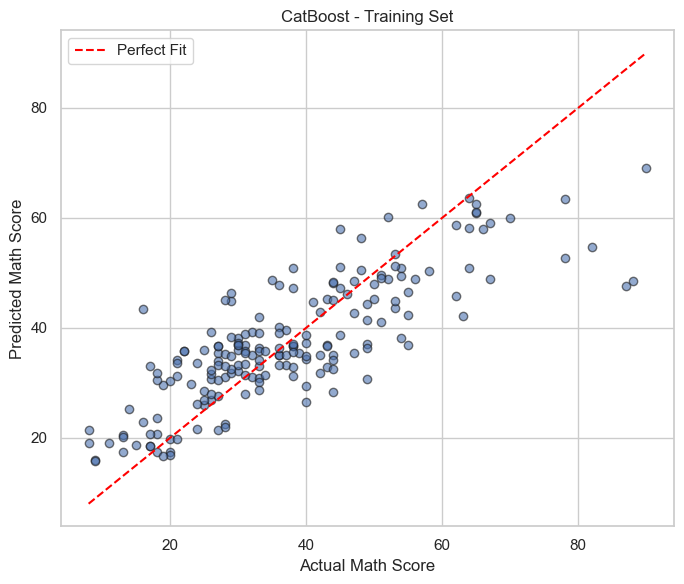

In [23]:
# ================================
# CatBoost Regressor Visualization
# ================================

# Get predictions
y_train_pred = best_tree_models["CatBoost"].predict(X_train)
y_test_pred = best_tree_models["CatBoost"].predict(X_test)

# --- Training set plot ---
plt.figure(figsize=(7, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolor="k")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
         color="red", linestyle="--", label="Perfect Fit")
plt.title("CatBoost - Training Set")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.legend()
plt.tight_layout()
plt.show()

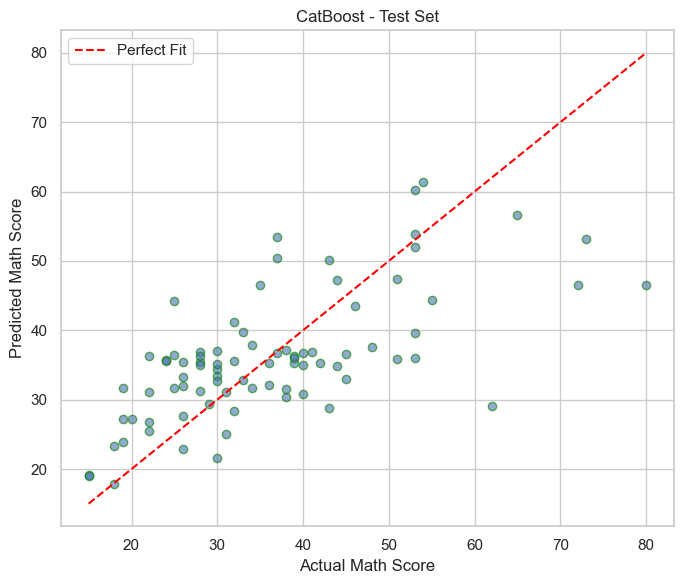

In [24]:
# --- Test set plot ---
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Perfect Fit")
plt.title("CatBoost - Test Set")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.legend()
plt.tight_layout()
plt.show()

1. Actual vs Predicted Scatter Plot — ⭐ Must include (Best & Most Important)
Purpose:

Shows how well the model is predicting in absolute terms.

Points near the 45° line indicate accurate predictions.

Systematic deviation (curved or skewed pattern) means bias or poor fit.

Why it’s essential before optimization:

It’s the clearest check of predictive performance.

If you see wide scatter or strong deviation from the diagonal, you know the model can be improved.

📌 Verdict: ✅ Keep this one for sure — it’s the most informative pre-tuning diagnostic.

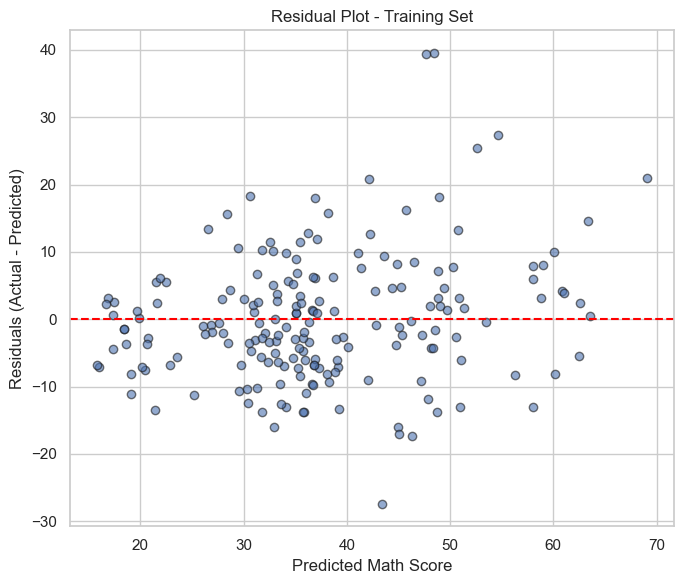

In [25]:
# ============================================================
# Residual Plots: Train & Test Sets (Separate Graphs)
# ============================================================

# Compute residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# --- Residuals (Training Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.6, edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residual Plot - Training Set")
plt.xlabel("Predicted Math Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()


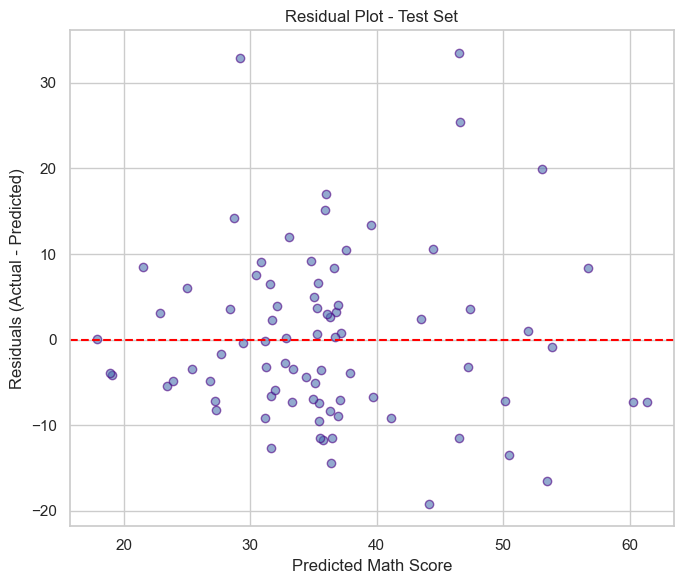

In [26]:
# --- Residuals (Test Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_test_pred, test_residuals, alpha=0.6, edgecolor="indigo")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residual Plot - Test Set")
plt.xlabel("Predicted Math Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

CatBoost 5-Fold RMSE: [11.13359051  9.78077576 13.59959742 11.03624519 12.62331914]
Mean RMSE: 11.634705604164484
Std Dev RMSE: 1.3330028987615865


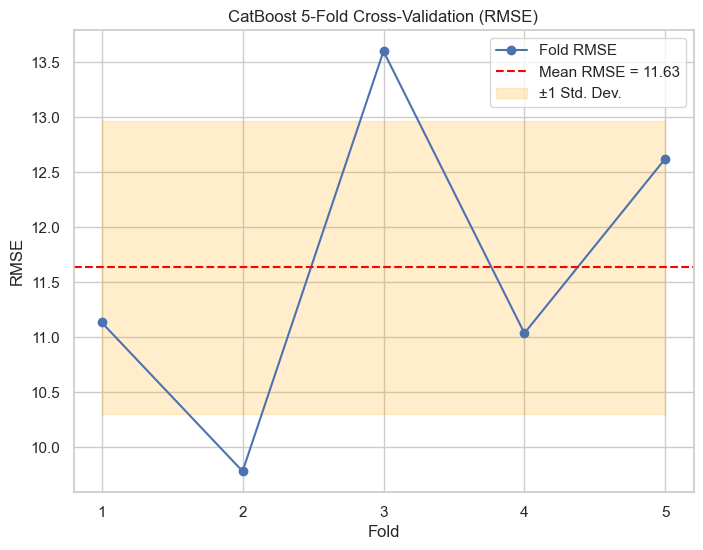

In [27]:
# ==========================
# CatBoost 5-Fold CV
# ==========================
cat_model = CatBoostRegressor(
    iterations=200,
    depth=5,
    learning_rate=0.1,
    random_state=42,
    silent=True
)

# Use RMSE scoring (note sklearn negates errors to maximize)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    cat_model, X_scaled, y, 
    cv=cv, 
    scoring="neg_root_mean_squared_error"
)

# Convert to positive RMSE
rmse_scores = -cv_scores

print("CatBoost 5-Fold RMSE:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std Dev RMSE:", rmse_scores.std())

# ==========================
# Plot the CV Results
# ==========================
plt.figure(figsize=(8,6))
plt.plot(range(1, 6), rmse_scores, marker="o", linestyle="-", label="Fold RMSE")
plt.axhline(rmse_scores.mean(), color="red", linestyle="--", label=f"Mean RMSE = {rmse_scores.mean():.2f}")

# Add ±1 Std Dev shaded area
plt.fill_between(
    range(1, 6),
    rmse_scores.mean() - rmse_scores.std(),
    rmse_scores.mean() + rmse_scores.std(),
    color="orange", alpha=0.2, label="±1 Std. Dev."
)

plt.title("CatBoost 5-Fold Cross-Validation (RMSE)")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

## **4.5 Final Model Selection** 

## **Optimized CatBoost**

In [28]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ==================================
# Re-run CatBoost with best params + early stopping
# ==================================
best_params = {
    'subsample': 0.7,
    'random_strength': 2,
    'learning_rate': 0.01,
    'l2_leaf_reg': 5,
    'depth': 4,
    'border_count': 128,
    'bagging_temperature': 0.5,
    'iterations': 2000,          # increase boosting rounds
    'early_stopping_rounds': 100 # stop if no improvement
}

cat_final = CatBoostRegressor(
    **best_params,
    random_state=42,
    silent=True
)

# Fit model with validation set
cat_final.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=100
)

# Predictions
y_pred_final = cat_final.predict(X_test)

# Metrics
final_mae = mean_absolute_error(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

print("\n=== Final CatBoost (Extended Training) ===")
print("Test MAE:", final_mae)
print("Test RMSE:", final_rmse)


0:	learn: 16.1519635	test: 13.4386993	best: 13.4386993 (0)	total: 1.88ms	remaining: 3.77s
100:	learn: 12.7273719	test: 11.0789530	best: 11.0789530 (100)	total: 111ms	remaining: 2.09s
200:	learn: 11.2151236	test: 10.2377885	best: 10.2377885 (200)	total: 203ms	remaining: 1.82s
300:	learn: 10.4280671	test: 9.8926908	best: 9.8918658 (299)	total: 296ms	remaining: 1.67s
400:	learn: 9.9152864	test: 9.8032177	best: 9.8031698 (398)	total: 376ms	remaining: 1.5s
500:	learn: 9.5451362	test: 9.7737566	best: 9.7657660 (480)	total: 471ms	remaining: 1.41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 9.765766022
bestIteration = 480

Shrink model to first 481 iterations.

=== Final CatBoost (Extended Training) ===
Test MAE: 7.492483516469973
Test RMSE: 9.765766021774951


In [29]:
# ======================================
# Final Improved CatBoost Model Training
# ======================================

from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import joblib

# -------------------------------
# Step 1: Define optimized CatBoost
# -------------------------------
cat_final = CatBoostRegressor(
    iterations=480,           # best iteration found earlier
    depth=4,
    learning_rate=0.01,
    subsample=0.7,
    random_strength=2,
    l2_leaf_reg=5,
    border_count=128,
    bagging_temperature=0.5,
    random_state=42,
    silent=True
)

# -------------------------------
# Step 2: Train the model
# -------------------------------
cat_final.fit(X_train, y_train)

# -------------------------------
# Step 3: Evaluate on test set
# -------------------------------
y_pred = cat_final.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Final Optimized CatBoost ===")
print(f"Test MAE:  {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")



=== Final Optimized CatBoost ===
Test MAE:  7.4947
Test RMSE: 9.7662


## **4.6 Model Interpretation and Explainability**

In [38]:
# Keep feature names safe before scaling
feature_names = X.columns  

# Standardize Predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)


Shape of X_scaled: (272, 13)


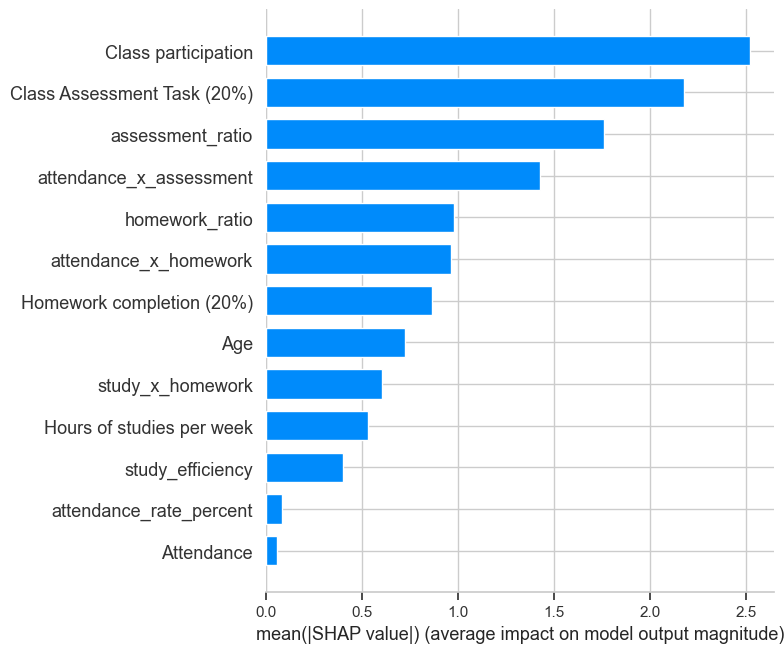

In [43]:
# ======================================
# SHAP Analysis for Interpretability
# ======================================

# Step 4: Create SHAP Explainer
explainer = shap.TreeExplainer(cat_final)
shap_values = explainer.shap_values(X_test)

# Step 5: Use original feature names from X
feature_names = X.columns   # X is your pre-scaled DataFrame with 13 features
X_test_df = pd.DataFrame(X_test, columns=feature_names)
# Step 6: SHAP Plots
shap.summary_plot(shap_values, X_test_df, plot_type="bar", feature_names=feature_names)

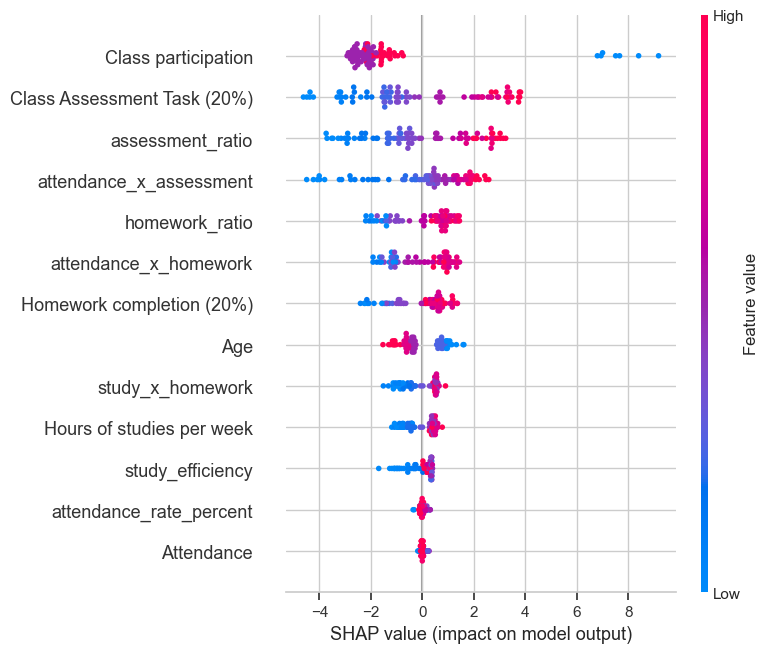

In [45]:
# Step 6: Global SHAP Summary Plot
# SHapley Additive exPlanations
shap.summary_plot(shap_values, X_test_df, feature_names=X_test_df.columns)

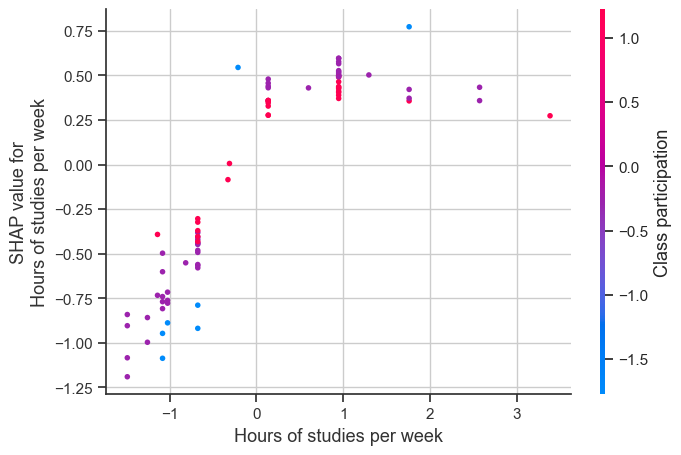

In [51]:
# --- SHAP Dependence Plot (for one important feature) ---

# Make sure X_test has feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Choose target feature
target_feature = "Hours of studies per week" if "Hours of studies per week" in X_test_df.columns else X_test_df.columns[0]

# Dependence plot (must use X_test_df since shap_values were computed on X_test)
shap.dependence_plot(target_feature, shap_values, X_test_df, feature_names=feature_names)


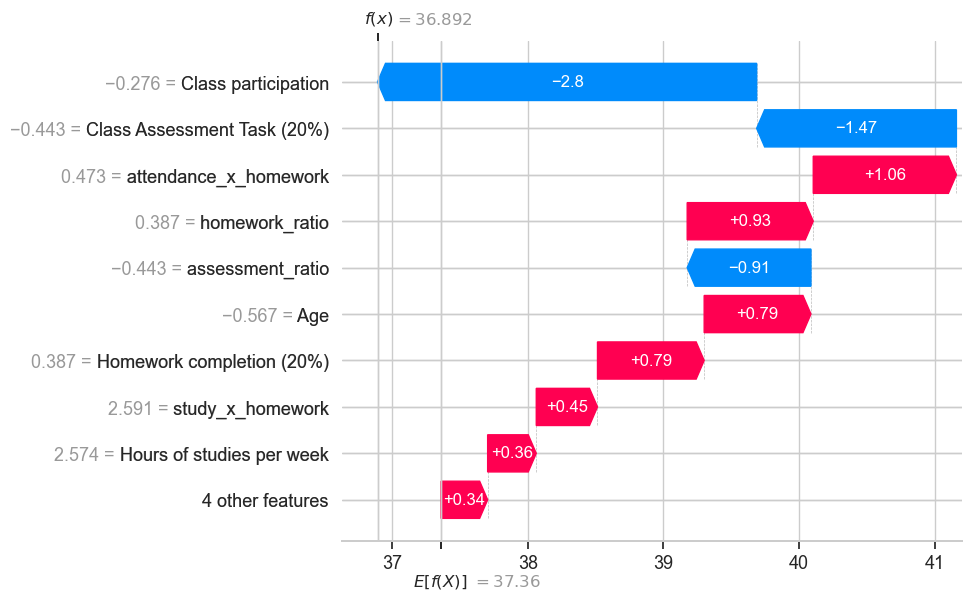

In [54]:
# Convert train/test back to DataFrames
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df  = pd.DataFrame(X_test, columns=feature_names)

# --- Individual Waterfall Plot (local explanation for one student) ---
sample_idx = 0  # change to pick another student
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[sample_idx],
        base_values=explainer.expected_value,
        data=X_test_df.iloc[sample_idx],  # ✅ use DataFrame
        feature_names=feature_names
    )
)

In [56]:
# Compute mean absolute SHAP values
feature_importance = np.abs(shap_values).mean(axis=0)

# Create DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Mean |SHAP|": feature_importance
}).sort_values("Mean |SHAP|", ascending=False)

print("Top 10 Most Influential Features on Math Score:")
print(importance_df.head(10))

Top 10 Most Influential Features on Math Score:
                        Feature  Mean |SHAP|
12          Class participation     2.518504
0   Class Assessment Task (20%)     2.178108
7              assessment_ratio     1.758202
10      attendance_x_assessment     1.425002
6                homework_ratio     0.975754
9         attendance_x_homework     0.961741
1     Homework completion (20%)     0.862068
4                           Age     0.721296
11             study_x_homework     0.603147
2     Hours of studies per week     0.532163


## **4.7 Classification and Early-Warning Application**

## Confusion Matrix + Classification Report

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# Step 4: Define threshold (pass mark)
# ===============================
threshold = 50  # students scoring below 50 are 'at-risk'

# Convert actual and predicted scores to categorical classes
y_true_class = (y_test >= threshold).astype(int)   # 1 = Not at-risk, 0 = At-risk
y_pred_class = (y_pred >= threshold).astype(int)

In [58]:
# ===============================
#  Confusion Matrix & Report
# ===============================
cm = confusion_matrix(y_true_class, y_pred_class)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[66  2]
 [ 8  6]]


In [59]:
print("\nClassification Report:")
print(classification_report(y_true_class, y_pred_class, 
                            target_names=["At-risk (<50)", "Not at-risk (>=50)"]))



Classification Report:
                    precision    recall  f1-score   support

     At-risk (<50)       0.89      0.97      0.93        68
Not at-risk (>=50)       0.75      0.43      0.55        14

          accuracy                           0.88        82
         macro avg       0.82      0.70      0.74        82
      weighted avg       0.87      0.88      0.86        82



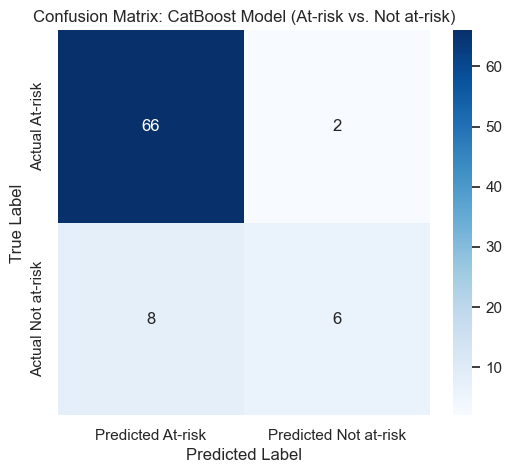

In [60]:
# ===============================
# Plot Confusion Matrix
# ===============================
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted At-risk", "Predicted Not at-risk"],
            yticklabels=["Actual At-risk", "Actual Not at-risk"])
plt.title("Confusion Matrix: CatBoost Model (At-risk vs. Not at-risk)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

## **4.8 Re-evaluation** 

=== 5-Fold CV Results (Optimized CatBoost) ===
RMSE Scores: [10.64432932  8.5259452  13.22761059 10.3440903  12.20106706]
Mean RMSE: 10.9886 | Std: 1.6175
MAE Scores: [8.05222983 6.85129372 8.56034872 8.24834173 9.47192119]
Mean MAE: 8.2368 | Std: 0.8466


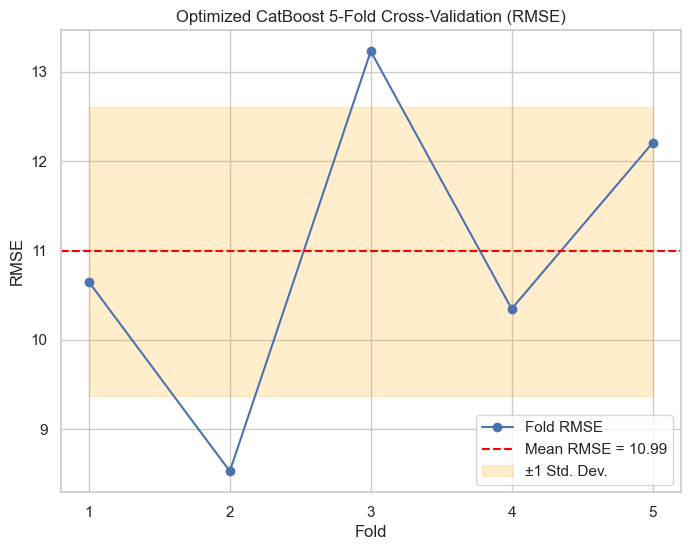

In [61]:
# ======================================
# Optimized CatBoost 5-Fold CV (Re-Evaluation)
# ======================================

from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define 5-fold CV strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- RMSE scoring ---
rmse_scores = -cross_val_score(
    cat_final, X_scaled, y, 
    cv=cv, 
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# --- MAE scoring ---
mae_scores = -cross_val_score(
    cat_final, X_scaled, y, 
    cv=cv, 
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Print results
print("=== 5-Fold CV Results (Optimized CatBoost) ===")
print("RMSE Scores:", rmse_scores)
print(f"Mean RMSE: {rmse_scores.mean():.4f} | Std: {rmse_scores.std():.4f}")
print("MAE Scores:", mae_scores)
print(f"Mean MAE: {mae_scores.mean():.4f} | Std: {mae_scores.std():.4f}")

# ==========================
# Plot RMSE with mean + std
# ==========================
plt.figure(figsize=(8,6))

# RMSE per fold (line + markers)
plt.plot(range(1, 6), rmse_scores, marker="o", linestyle="-", label="Fold RMSE")

# Horizontal line = mean RMSE
plt.axhline(rmse_scores.mean(), color="red", linestyle="--",
            label=f"Mean RMSE = {rmse_scores.mean():.2f}")

# Add ±1 Std Dev shaded area
plt.fill_between(
    range(1, 6),
    rmse_scores.mean() - rmse_scores.std(),
    rmse_scores.mean() + rmse_scores.std(),
    color="orange", alpha=0.2, label="±1 Std. Dev."
)

plt.title("Optimized CatBoost 5-Fold Cross-Validation (RMSE)")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()


# **Application of the Model**

In [52]:
# ======================================
# Refit Optimized CatBoost before Saving
# ======================================
from catboost import CatBoostRegressor

# --- Define optimized CatBoost model (best parameters you found) ---
cat_final = CatBoostRegressor(
    iterations=480,
    depth=4,
    learning_rate=0.01,
    subsample=0.7,
    random_strength=2,
    l2_leaf_reg=5,
    border_count=128,
    bagging_temperature=0.5,
    random_state=42,
    silent=True
)

# --- Train the model (refit) ---
cat_final.fit(X_train, y_train)

# --- Save in CatBoost's native format (.cbm) ---
cat_final.save_model("Finaloptimized_catboost_model.cbm")
print("Model saved as Finaloptimized_catboost_model.cbm")

# --- Load the model back ---
cat_loaded = CatBoostRegressor()
cat_loaded.load_model("Finaloptimized_catboost_model.cbm")
print("Model loaded successfully!")


Model saved as Finaloptimized_catboost_model.cbm
Model loaded successfully!


In [53]:
def interactive_multi_prediction(model, feature_names, df):
    print("\n== Student Final Math Score Prediction (Multiple Students) ===")

    # Menu of features
    features = {
        "1": "Age",
        "2": "Hours of studies per week",
        "3": "Attendance",
        "4": "Homework completion (20%)",
        "5": "Class Assessment Task (20%)",
        "6": "Class participation"
    }

    # Ask teacher how many students
    while True:
        try:
            n_students = int(input("\nHow many students do you want to predict for? "))
            if n_students <= 0:
                print("❌ Please enter a positive number.")
            else:
                break
        except ValueError:
            print("❌ Enter a valid number.")

    all_students = []

    for i in range(n_students):
        print(f"\n--- Enter details for Student {i+1} ---")

        # Show menu
        for key, col in features.items():
            print(f"{key}. {col}")

        # Select feature
        choice = None
        while choice not in features:
            choice = input("\nEnter choice (1–6): ").strip()
            if choice not in features:
                print("❌ Invalid choice. Please select 1–6.")

        selected_feature = features[choice]

        # Start with averages/mode
        student_data = {col: df[col].mode()[0] if df[col].dtype == "object" else df[col].mean() 
                        for col in features.values()}

        # Handle the chosen feature
        if selected_feature == "Class participation":
            value = None
            while value not in ["Low", "Moderate", "High"]:
                value = input("Enter Class participation (Low / Moderate / High): ").capitalize()
                if value not in ["Low", "Moderate", "High"]:
                    print("❌ Invalid input. Choose Low, Moderate or High.")
            student_data[selected_feature] = value

        elif selected_feature == "Age":
            while True:
                try:
                    value = float(input("Enter Age (no restriction): "))
                    student_data[selected_feature] = value
                    break
                except ValueError:
                    print("❌ Please enter a valid number.")

        elif selected_feature in ["Homework completion (20%)", "Class Assessment Task (20%)"]:
            value = None
            while value is None:
                try:
                    raw_val = float(input(f"Enter {selected_feature} (Range: 0 – 20): "))
                    if not (0 <= raw_val <= 20):
                        print("❌ Value must be between 0 and 20. Try again.")
                    else:
                        value = raw_val
                        student_data[selected_feature] = value
                except ValueError:
                    print("❌ Please enter a valid number.")

        elif selected_feature == "Attendance":
            while True:
                try:
                    raw_val = float(input("Enter Attendance (10 and above): "))
                    if raw_val < 10:
                        print("❌ Attendance must be 10 or higher. Try again.")
                    else:
                        student_data[selected_feature] = raw_val
                        break
                except ValueError:
                    print("❌ Please enter a valid number.")

        elif selected_feature == "Hours of studies per week":
            while True:
                try:
                    raw_val = float(input("Enter Hours of studies per week (0 and above): "))
                    if raw_val < 0:
                        print("❌ Hours must be 0 or higher. Try again.")
                    else:
                        student_data[selected_feature] = raw_val
                        break
                except ValueError:
                    print("❌ Please enter a valid number.")

        all_students.append(student_data)

    # Convert to DataFrame
    input_df = pd.DataFrame(all_students)

    # Feature engineering (same as training pipeline)
    input_df['attendance_rate_percent'] = input_df['Attendance'] / 71
    input_df['homework_ratio'] = input_df['Homework completion (20%)'] / 20
    input_df['assessment_ratio'] = input_df['Class Assessment Task (20%)'] / 20
    input_df['study_efficiency'] = input_df['Hours of studies per week'] / (input_df['Homework completion (20%)'] + 1)
    input_df['attendance_x_homework'] = input_df['attendance_rate_percent'] * input_df['homework_ratio']
    input_df['attendance_x_assessment'] = input_df['attendance_rate_percent'] * input_df['assessment_ratio']
    input_df['study_x_homework'] = input_df['study_efficiency'] * input_df['homework_ratio']

    # One-hot encoding for categorical
    input_df = pd.get_dummies(input_df)

    # Align with training features
    for col in feature_names:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[feature_names]

    # Predictions
    predictions = model.predict(input_df)

    # Convert to At-risk / Not at-risk
    risk_labels = ["At-risk" if score < 50 else "Not at-risk" for score in predictions]

    # Combine results
    results = pd.DataFrame({
        "Student": [f"Student {i+1}" for i in range(n_students)],
        "Predicted Final Math Score": predictions,
        "Risk Category": risk_labels
    })

    print("\n===================================")
    print(results.to_string(index=False, formatters={
        "Predicted Final Math Score": "{:.2f}".format
    }))
    print("===================================")

    return results

In [55]:
results = interactive_multi_prediction(cat_loaded, feature_names, df)


== Student Final Math Score Prediction (Multiple Students) ===



How many students do you want to predict for?  1



--- Enter details for Student 1 ---
1. Age
2. Hours of studies per week
3. Attendance
4. Homework completion (20%)
5. Class Assessment Task (20%)
6. Class participation



Enter choice (1–6):  7


❌ Invalid choice. Please select 1–6.



Enter choice (1–6):  6
Enter Class participation (Low / Moderate / High):  Moderate



  Student Predicted Final Math Score Risk Category
Student 1                      45.88       At-risk


In [56]:
results = interactive_multi_prediction(cat_loaded, feature_names, df)


== Student Final Math Score Prediction (Multiple Students) ===



How many students do you want to predict for?  2



--- Enter details for Student 1 ---
1. Age
2. Hours of studies per week
3. Attendance
4. Homework completion (20%)
5. Class Assessment Task (20%)
6. Class participation



Enter choice (1–6):  1
Enter Age (no restriction):  15



--- Enter details for Student 2 ---
1. Age
2. Hours of studies per week
3. Attendance
4. Homework completion (20%)
5. Class Assessment Task (20%)
6. Class participation



Enter choice (1–6):  3
Enter Attendance (10 and above):  50



  Student Predicted Final Math Score Risk Category
Student 1                      45.85       At-risk
Student 2                      45.55       At-risk


In [57]:
results = interactive_multi_prediction(cat_loaded, feature_names, df)


== Student Final Math Score Prediction (Multiple Students) ===



How many students do you want to predict for?  3



--- Enter details for Student 1 ---
1. Age
2. Hours of studies per week
3. Attendance
4. Homework completion (20%)
5. Class Assessment Task (20%)
6. Class participation



Enter choice (1–6):  2
Enter Hours of studies per week (0 and above):  50



--- Enter details for Student 2 ---
1. Age
2. Hours of studies per week
3. Attendance
4. Homework completion (20%)
5. Class Assessment Task (20%)
6. Class participation



Enter choice (1–6):  2
Enter Hours of studies per week (0 and above):  20



--- Enter details for Student 3 ---
1. Age
2. Hours of studies per week
3. Attendance
4. Homework completion (20%)
5. Class Assessment Task (20%)
6. Class participation



Enter choice (1–6):  2
Enter Hours of studies per week (0 and above):  70



  Student Predicted Final Math Score Risk Category
Student 1                      45.79       At-risk
Student 2                      45.89       At-risk
Student 3                      45.76       At-risk


In [58]:
import pandas as pd
import joblib

# ======================================
# Interactive Multi-Student Prediction (All Variables)
# ======================================
def interactive_multi_prediction(model, feature_names, df):
    print("\n== Student Final Math Score Prediction (Multiple Students) ===")

    # Menu of features
    features = {
        "1": "Age",
        "2": "Hours of studies per week",
        "3": "Attendance",
        "4": "Homework completion (20%)",
        "5": "Class Assessment Task (20%)",
        "6": "Class participation"
    }

    # Ask teacher how many students
    while True:
        try:
            n_students = int(input("\nHow many students do you want to predict for? "))
            if n_students <= 0:
                print("❌ Please enter a positive number.")
            else:
                break
        except ValueError:
            print("❌ Enter a valid number.")

    all_students = []

    for i in range(n_students):
        print(f"\n--- Enter details for Student {i+1} ---")
        student_data = {}

        for key, col in features.items():
            if col == "Class participation":
                value = None
                while value not in ["Low", "Moderate", "High"]:
                    value = input("Enter Class participation (Low / Moderate / High): ").capitalize()
                    if value not in ["Low", "Moderate", "High"]:
                        print("❌ Invalid input. Choose Low, Moderate or High.")
                student_data[col] = value

            elif col == "Age":
                while True:
                    try:
                        value = float(input("Enter Age (no restriction): "))
                        student_data[col] = value
                        break
                    except ValueError:
                        print("❌ Please enter a valid number.")

            elif col in ["Homework completion (20%)", "Class Assessment Task (20%)"]:
                value = None
                while value is None:
                    try:
                        raw_val = float(input(f"Enter {col} (Range: 0 – 20): "))
                        if not (0 <= raw_val <= 20):
                            print(f"❌ {col} must be between 0 and 20. Try again.")
                        else:
                            value = raw_val
                    except ValueError:
                        print("❌ Please enter a valid number.")
                student_data[col] = value

            elif col == "Attendance":
                while True:
                    try:
                        raw_val = float(input("Enter Attendance (10 and above): "))
                        if raw_val < 10:
                            print("❌ Attendance must be 10 or higher. Try again.")
                        else:
                            student_data[col] = raw_val
                            break
                    except ValueError:
                        print("❌ Please enter a valid number.")

            elif col == "Hours of studies per week":
                while True:
                    try:
                        raw_val = float(input("Enter Hours of studies per week (0 and above): "))
                        if raw_val < 0:
                            print("❌ Hours must be 0 or higher. Try again.")
                        else:
                            student_data[col] = raw_val
                            break
                    except ValueError:
                        print("❌ Please enter a valid number.")

        all_students.append(student_data)

    # Convert to DataFrame
    input_df = pd.DataFrame(all_students)

    # Feature engineering
    input_df['attendance_rate_percent'] = input_df['Attendance'] / 71
    input_df['homework_ratio'] = input_df['Homework completion (20%)'] / 20
    input_df['assessment_ratio'] = input_df['Class Assessment Task (20%)'] / 20
    input_df['study_efficiency'] = input_df['Hours of studies per week'] / (input_df['Homework completion (20%)'] + 1)
    input_df['attendance_x_homework'] = input_df['attendance_rate_percent'] * input_df['homework_ratio']
    input_df['attendance_x_assessment'] = input_df['attendance_rate_percent'] * input_df['assessment_ratio']
    input_df['study_x_homework'] = input_df['study_efficiency'] * input_df['homework_ratio']

    # One-hot encoding for categorical
    input_df = pd.get_dummies(input_df)

    # Align with training features
    for col in feature_names:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[feature_names]

    # Predictions
    predictions = model.predict(input_df)

    # Add Risk Category
    risk_labels = ["At-risk" if score < 50 else "Not at-risk" for score in predictions]

    # Combine results
    results = pd.DataFrame({
        "Student": [f"Student {i+1}" for i in range(n_students)],
        "Predicted Final Math Score": predictions,
        "Risk Category": risk_labels
    })

    print("\n===================================")
    print(results.to_string(index=False, formatters={
        "Predicted Final Math Score": "{:.2f}".format
    }))
    print("===================================")

    return results


In [59]:
results = interactive_multi_prediction(cat_loaded, feature_names, df)


== Student Final Math Score Prediction (Multiple Students) ===



How many students do you want to predict for?  1



--- Enter details for Student 1 ---


Enter Age (no restriction):  20
Enter Hours of studies per week (0 and above):  50
Enter Attendance (10 and above):  15
Enter Homework completion (20%) (Range: 0 – 20):  15
Enter Class Assessment Task (20%) (Range: 0 – 20):  15
Enter Class participation (Low / Moderate / High):  low



  Student Predicted Final Math Score Risk Category
Student 1                      43.82       At-risk


### **Streamlit app**

In [ ]:
with open('OptFinalWork1app.py', 'w', encoding="utf-8") as f:
    f.write('''\
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# ------------------------------
# Page Config & Header
# ------------------------------
st.set_page_config(page_title="🎓 Student Math Score Predictor", page_icon="📘", layout="wide")
st.title("📘 Student Final Math Score Prediction - Ghanaian Junior High School")


# --- Welcome Message ---
st.markdown("<h2 style='text-align:center; color:skyblue;'>🌟 Welcome to the Student Final Math Score Prediction App 🌟</h2>", unsafe_allow_html=True)
st.markdown("<p style='text-align:center; color:white;'>Let's explore how Machine Learning can help you understand and improve student performance.</p>", unsafe_allow_html=True)


with st.expander("ℹ️ About This App", expanded=False):
    st.write("""
    This tool helps teachers and education stakeholders **predict students’ final math scores** based on key factors such as attendance, homework completion, class assessment task, age, study hour per week
and class participation.
    It provides early warnings to guide timely intervention and support.
    """)

# --- Short Guidelines ---
st.markdown("""
### 📝 Quick Guide
1. Choose how to input data — one variable per student or all variables.  
2. Enter student information.  
3. Click **🎯 Predict** to view scores and risk categories.  
4. Download results as a CSV if needed.
""")

# ------------------------------
# Load model & data
# ------------------------------
try:
    model = joblib.load('catboost_model.pkl')
    df = pd.read_excel('NEW DATA OF STUDENTS OF VRA JHS NO. 2.xlsx')
except FileNotFoundError:
    st.error("❌ Model or data file not found. Ensure both 'catboost_model.pkl' and 'NEW DATA OF STUDENTS OF VRA JHS NO. 2.xlsx' exist in this directory.")
    st.stop()

# Try to extract feature names from model
try:
    feature_names = model.feature_names_
except Exception:
    st.error("⚠️ Could not extract feature names from model. Ensure your CatBoost model is saved with feature names.")
    st.stop()

# ------------------------------
# Sidebar Configuration
# ------------------------------
st.sidebar.header("🧮 Prediction Settings")
mode = st.sidebar.radio("Select Input Mode", ["One Variable per Student", "All Variables per Student"])
n_students = st.sidebar.number_input("Input the Number of Students you want to predict for", min_value=1, max_value=100, value=1, step=1)

# ------------------------------
# Feature Mapping
# ------------------------------
features = {
    "1": "Age",
    "2": "Hours of studies per week",
    "3": "Attendance",
    "4": "Homework completion (20%)",
    "5": "Class Assessment Task (20%)",
    "6": "Class participation"
}

# ------------------------------
# Data Collection Function
# ------------------------------
def collect_student_data(n_students, all_vars=False):
    students = []
    for i in range(n_students):
        st.subheader(f"🧑‍🎓 Student {i+1}")
        student = {}
        
        if not all_vars:
            selected_feature = st.selectbox(f"Select feature for Student {i+1}", list(features.values()), key=f"feature_{i}")
            student = {
                col: df[col].mode()[0] if df[col].dtype == "object" else df[col].mean()
                for col in features.values()
            }

            if selected_feature == "Class participation":
                student[selected_feature] = st.selectbox("Class participation", ["Low", "Moderate", "High"], key=f"part_{i}")
            elif selected_feature == "Age":
                student[selected_feature] = st.number_input("Age", min_value=5, max_value=25, step=1, key=f"age_{i}")
            elif selected_feature in ["Homework completion (20%)", "Class Assessment Task (20%)"]:
                student[selected_feature] = st.number_input(f"{selected_feature} (0–20)", min_value=0.0, max_value=20.0, step=0.1, key=f"{selected_feature}_{i}")
            elif selected_feature == "Attendance":
                student[selected_feature] = st.number_input("Attendance (10 and above)", min_value=10, step=1, key=f"att_{i}")
            elif selected_feature == "Hours of studies per week":
                student[selected_feature] = st.number_input("Hours of studies per week", min_value=0.0, step=0.1, key=f"hours_{i}")

        else:
            student["Age"] = st.number_input("Age", min_value=5, max_value=25, step=1, key=f"age_{i}")
            student["Hours of studies per week"] = st.number_input("Hours of studies per week", min_value=0.0, step=0.1, key=f"hours_{i}")
            student["Attendance"] = st.number_input("Attendance (10 and above)", min_value=10, step=1, key=f"att_{i}")
            student["Homework completion (20%)"] = st.number_input("Homework completion (0–20)", min_value=0.0, max_value=20.0, step=0.1, key=f"home_{i}")
            student["Class Assessment Task (20%)"] = st.number_input("Class Assessment Task (0–20)", min_value=0.0, max_value=20.0, step=0.1, key=f"assess_{i}")
            student["Class participation"] = st.selectbox("Class participation", ["Low", "Moderate", "High"], key=f"part_{i}")
        
        students.append(student)
    return students

# ------------------------------
# Collect Data
# ------------------------------
student_data = collect_student_data(int(n_students), all_vars=(mode == "All Variables per Student"))

# ------------------------------
# Prediction
# ------------------------------
if st.button("🎯 Predict"):
    try:
        input_df = pd.DataFrame(student_data)

        # --- Feature Engineering ---
        input_df['attendance_rate_percent'] = input_df['Attendance'] / 71
        input_df['homework_ratio'] = input_df['Homework completion (20%)'] / 20
        input_df['assessment_ratio'] = input_df['Class Assessment Task (20%)'] / 20
        input_df['study_efficiency'] = input_df['Hours of studies per week'] / (input_df['Homework completion (20%)'] + 1)
        input_df['attendance_x_homework'] = input_df['attendance_rate_percent'] * input_df['homework_ratio']
        input_df['attendance_x_assessment'] = input_df['attendance_rate_percent'] * input_df['assessment_ratio']
        input_df['study_x_homework'] = input_df['study_efficiency'] * input_df['homework_ratio']

        # --- Encoding ---
        input_df = pd.get_dummies(input_df)
        for col in feature_names:
            if col not in input_df.columns:
                input_df[col] = 0
        input_df = input_df[feature_names]
        # --- Model Prediction ---
        preds = model.predict(input_df)
        risk_labels = ["⚠️ At-Risk" if score < 50 else "✅ Not At-Risk" for score in preds]

        results = pd.DataFrame({
            "Student": [f"Student {i+1}" for i in range(len(preds))],
            "Predicted Final Math Score": preds,
            "Risk Category": risk_labels
        })


        import altair as alt

        # --- Display Results in Tabs ---
        tab1, tab2 = st.tabs(["🔢 Predictions", "📈 Visual Insights"])

        with tab1:
            st.dataframe(results.style.format({"Predicted Final Math Score": "{:.2f}"}))

        with tab2:
            st.subheader("📊 Predicted Math Scores per Student")

            chart = (
        alt.Chart(results)
        .mark_bar()
        .encode(
            x=alt.X("Student", sort=None, axis=alt.Axis(labelAngle=0, title="Students")),
            y=alt.Y("Predicted Final Math Score", title="Score"),
            color=alt.Color(
                "Risk Category",
                legend=alt.Legend(title="Risk Category"),
                scale=alt.Scale(domain=["⚠️ At-Risk", "✅ Not At-Risk"],
                               range=["#e74c3c", "#2ecc71"])  # red & green
            ),
            tooltip=["Student", "Predicted Final Math Score", "Risk Category"]
        )
        .properties(width=500, height=400)
    )
            st.altair_chart(chart, use_container_width=True)


    
         # --- Summary Insights ---
        avg_score = np.mean(preds)
        at_risk = np.sum(preds < 50)
        
       
        # --- General Encouraging Message ---
        if at_risk > 0:
            message = (
                "The student needs support."
                if at_risk == 1
                else "The students need support."
            )
            st.info(message)

        # --- Download Results ---
        csv = results.to_csv(index=False).encode("utf-8")
        st.download_button("📥 Download Results as CSV", csv, "prediction_results.csv", "text/csv")

    except Exception as e:
        st.error(f"Prediction failed: {str(e)}")

# ------------------------------
# Footer
# ------------------------------
st.markdown("---")
st.markdown("<p style='text-align:center;color:gray;'>Developed by <b>Regina Robertson</b> | Capstone Project © 2025</p>", unsafe_allow_html=True)

''')

print("Catboost OptFinalWork1app is saved successfully.")

In [ ]:
# Descriptive statistics for categorical variables
data = {
    "Variable": [
        "Gender", "Gender",
        "Class Participation", "Class Participation", "Class Participation",
        "Extra-Curricular Involvement", "Extra-Curricular Involvement",
        "Parents’ Marital Status", "Parents’ Marital Status", "Parents’ Marital Status", "Parents’ Marital Status", "Parents’ Marital Status",
        "Whom They Are Staying With", "Whom They Are Staying With", "Whom They Are Staying With", "Whom They Are Staying With",
        "Whom They Are Staying With", "Whom They Are Staying With", "Whom They Are Staying With", "Whom They Are Staying With",
        "Whom They Are Staying With", "Whom They Are Staying With", "Whom They Are Staying With"
    ],
    "Category": [
        "Male", "Female",
        "Low", "Moderate", "High",
        "No", "Yes",
        "Married", "Divorced", "1 Dead", "2 Dead", "Mother",
        "Parents", "Mother", "Aunty", "Father", "Grandmother", "Grandparents",
        "Uncle", "Sister", "Brother", "Not a relative", "Aunty & Uncle"
    ],
    "Frequency": [
        150, 122,
        142, 90, 40,
        172, 100,
        233, 20, 16, 2, 1,
        200, 26, 12, 7, 6, 6,
        5, 3, 3, 2, 1
    ]
}

df = pd.DataFrame(data)

df["Percentage"] = (df["Frequency"] / df["Frequency"].sum() * 100).round(2)

for var in df["Variable"].unique():
    print(f"\n{var}")
    print(df[df["Variable"] == var][["Category", "Frequency", "Percentage"]])

###  **The End**